# Tutorial: OrdNMF

In [1]:
import sys
sys.path.append("model/OrdNMF")

import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

from OrdNMF import OrdNMF

In [2]:
U = 1000
I = 2000
K = 10
V = 10

W = np.random.gamma(1.,1.,(U,K))
H = np.random.gamma(1.,1.,(I,K))
L = W.dot(H.T)
Ya = np.random.binomial(V,1-np.exp(-.1*L))
Y = sparse.csr_matrix(Ya)

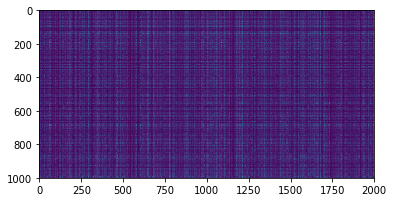

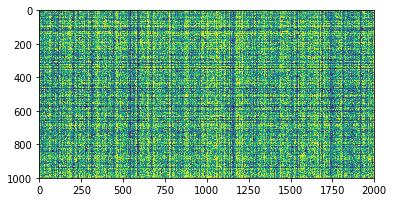

In [3]:
plt.figure()
plt.imshow(L)
plt.figure()
plt.imshow(Ya)

In [4]:
model = OrdNMF(K=K)
model.fit(Y, T=10, precision=10**(-3), seed=0, verbose=True, save=False)

ITERATION #0
	Updates: time=1.25
	Rate:nan
ITERATION #1
	Updates...

model/OrdNMF/OrdNMF.py:159: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = (elbo-self.Elbo[-1])/np.abs(self.Elbo[-1])


	Updates: time=1.30
	Rate:0.04723401164260533
ITERATION #2
	Updates: time=1.16
	Rate:0.009547701954879717
ITERATION #3
	Updates: time=1.18
	Rate:0.0036078146202711127
ITERATION #4
	Updates: time=1.20
	Rate:0.0019162481848431323
ITERATION #5
	Updates: time=1.21
	Rate:0.0012466640313468476
ITERATION #6
	Updates: time=1.16
	Rate:0.0009213329473185085


In [5]:
Ew = model.Ew
Eh = model.Eh
El = Ew.dot(Eh.T)

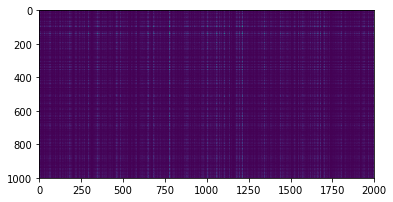

In [6]:
plt.figure()
plt.imshow(El)

In [7]:
theta = model.theta